In [1]:
import pandas as pd
import numpy as np

### Dataset Information:

This dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of interview. The problem is to predict the current contraceptive method choice (no use, long-term methods, or short-term methods) of a woman based on her demographic and socio-economic characteristics.

In [2]:
#Columns names
cols=['wife_age', 'wife_education','husband_education', 'number_of_children',
            'wife_religion', 'wife_is_working', 'husband_occupation', 'standard_of_living',
            'media_exposure', 'contraceptive_method_used']

#Importing data
df = pd.read_csv("cmc.data",names=cols)
df.head()

wife_age  wife_education  husband_education  number_of_children  \
0        24               2                  3                   3   
1        45               1                  3                  10   
2        43               2                  3                   7   
3        42               3                  2                   9   
4        36               3                  3                   8   

   wife_religion  wife_is_working  husband_occupation  standard_of_living  \
0              1                1                   2                   3   
1              1                1                   3                   4   
2              1                1                   3                   4   
3              1                1                   3                   3   
4              1                1                   3                   2   

   media_exposure  contraceptive_method_used  
0               0                          1  
1               0                          1  
2               0                          1  
3               0                          1  
4               0                          1

In [3]:
df.isnull().sum()

wife_age                     0
wife_education               0
husband_education            0
number_of_children           0
wife_religion                0
wife_is_working              0
husband_occupation           0
standard_of_living           0
media_exposure               0
contraceptive_method_used    0
dtype: int64

In [4]:
df.corr()

wife_age  wife_education  husband_education  \
wife_age                   1.000000       -0.048011          -0.052879   
wife_education            -0.048011        1.000000           0.618369   
husband_education         -0.052879        0.618369           1.000000   
number_of_children         0.540126       -0.193839          -0.187513   
wife_religion             -0.139543       -0.232973          -0.178447   
wife_is_working           -0.039880       -0.062200           0.001099   
husband_occupation        -0.202532       -0.395921          -0.337003   
standard_of_living         0.184485        0.361450           0.357490   
media_exposure             0.113306       -0.336080          -0.288691   
contraceptive_method_used -0.162953        0.149777           0.103226   

                           number_of_children  wife_religion  wife_is_working  \
wife_age                             0.540126      -0.139543        -0.039880   
wife_education                      -0.193839      -0.232973        -0.062200   
husband_education                   -0.187513      -0.178447         0.001099   
number_of_children                   1.000000       0.073917         0.097316   
wife_religion                        0.073917       1.000000         0.069837   
wife_is_working                      0.097316       0.069837         1.000000   
husband_occupation                  -0.023000       0.084417         0.014232   
standard_of_living                  -0.006046      -0.196308        -0.076505   
media_exposure                       0.133658       0.060243         0.001828   
contraceptive_method_used            0.082772      -0.025271         0.054438   

                           husband_occupation  standard_of_living  \
wife_age                            -0.202532            0.184485   
wife_education                      -0.395921            0.361450   
husband_education                   -0.337003            0.357490   
number_of_children                  -0.023000           -0.006046   
wife_religion                        0.084417           -0.196308   
wife_is_working                      0.014232           -0.076505   
husband_occupation                   1.000000           -0.293831   
standard_of_living                  -0.293831            1.000000   
media_exposure                       0.113925           -0.251359   
contraceptive_method_used            0.018161            0.091149   

                           media_exposure  contraceptive_method_used  
wife_age                         0.113306                  -0.162953  
wife_education                  -0.336080                   0.149777  
husband_education               -0.288691                   0.103226  
number_of_children               0.133658                   0.082772  
wife_religion                    0.060243                  -0.025271  
wife_is_working                  0.001828                   0.054438  
husband_occupation               0.113925                   0.018161  
standard_of_living              -0.251359                   0.091149  
media_exposure                   1.000000                  -0.119206  
contraceptive_method_used       -0.119206                   1.000000

In [5]:
df.contraceptive_method_used.value_counts(normalize=True, sort=False)

1    0.427020
2    0.226069
3    0.346911
Name: contraceptive_method_used, dtype: float64

### Attribute Information:

1. Wife's age (numerical)
2. Wife's education (categorical)      1=low, 2, 3, 4=high
3. Husband's education (categorical)      1=low, 2, 3, 4=high
4. Number of children ever born (numerical)
5. Wife's religion (binary)           0=Non-Islam, 1=Islam
6. Wife's now working? (binary)           0=Yes, 1=No
7. Husband's occupation (categorical)      1, 2, 3, 4
8. Standard-of-living index (categorical)      1=low, 2, 3, 4=high
9. Media exposure (binary)           0=Good, 1=Not good
10. Contraceptive method used (class attribute)  1=No-use, 2=Long-term, 3=Short-term


So let's manipulate the data to better apply ML methods on then, considering the meaning of each attribute.

# Hot encoding

#### Numerical and binary data: wife_age, number_of_children, wife_religion, wife_is_working, media_exposure. No manipulation needed!

In [6]:
#No manipulation needed. So let's just select it apart from the rest of dataframe:

df1 = df[['wife_age', 'number_of_children', 'wife_religion', 'wife_is_working', 'media_exposure']]
df1

wife_age  number_of_children  wife_religion  wife_is_working  \
0           24                   3              1                1   
1           45                  10              1                1   
2           43                   7              1                1   
3           42                   9              1                1   
4           36                   8              1                1   
...        ...                 ...            ...              ...   
1468        33                   2              1                0   
1469        33                   3              1                1   
1470        39                   8              1                0   
1471        33                   4              1                0   
1472        17                   1              1                1   

      media_exposure  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
1468               0  
1469               0  
1470               0  
1471               0  
1472               0  

[1473 rows x 5 columns]

#### Wife's education: we should get the dummy data, but first I am going to reduce 2 and 3 for a single category named "medium"

In [7]:
new_wife_education =[]

for i in df['wife_education']:
    if i==1:
        new_wife_education.append('low_wife_education')
    elif i==4:
        new_wife_education.append('high_wife_education')
    else:
        new_wife_education.append('medium_wife_education')

df['new_wife_education'] = new_wife_education
wife_education = pd.get_dummies(df[['new_wife_education']])

#### Husband's education: I will repeat the process I just did for wife

In [8]:
new_husband_education =[]

for i in df['husband_education']:
    if i==1:
        new_husband_education.append('low_husband_education')
    elif i==4:
        new_husband_education.append('high_husband_education')
    else:
        new_husband_education.append('medium_husband_education')

df['new_husband_education'] = new_husband_education
husband_education = pd.get_dummies(df[['new_husband_education']])

#### Husband's occupation: I will directly generate dummy variables

In [9]:
husband_occupation = pd.get_dummies(df[['husband_occupation']])

#### Standard-of-living index: I will treat this data the same way I treated the education ones before.

In [10]:
new_standard_of_living =[]

for i in df['standard_of_living']:
    if i==1:
        new_standard_of_living.append('low_standard_of_living')
    elif i==4:
        new_standard_of_living.append('high_standard_of_living')
    else:
        new_standard_of_living.append('medium_standard_of_living')

df['new_standard_of_living'] = new_standard_of_living
standard_of_living = pd.get_dummies(df[['new_standard_of_living']])

#### Contraceptive method used: the process will be similar, but here I will keep all categories

In [11]:
new_contraceptive_method =[]

for i in df['contraceptive_method_used']:
    if i==1:
        new_contraceptive_method.append('no_contraceptive_method')
    elif i==2:
        new_contraceptive_method.append('long_term_contraceptive_method')
    elif i==3:
        new_contraceptive_method.append('short_term_contraceptive_method')

df['new_contraceptive_method'] = new_contraceptive_method
contraceptive_method = pd.get_dummies(df[['new_contraceptive_method']])

So, finally, we have:

In [12]:
df.head()

wife_age  wife_education  husband_education  number_of_children  \
0        24               2                  3                   3   
1        45               1                  3                  10   
2        43               2                  3                   7   
3        42               3                  2                   9   
4        36               3                  3                   8   

   wife_religion  wife_is_working  husband_occupation  standard_of_living  \
0              1                1                   2                   3   
1              1                1                   3                   4   
2              1                1                   3                   4   
3              1                1                   3                   3   
4              1                1                   3                   2   

   media_exposure  contraceptive_method_used     new_wife_education  \
0               0                          1  medium_wife_education   
1               0                          1     low_wife_education   
2               0                          1  medium_wife_education   
3               0                          1  medium_wife_education   
4               0                          1  medium_wife_education   

      new_husband_education     new_standard_of_living  \
0  medium_husband_education  medium_standard_of_living   
1  medium_husband_education    high_standard_of_living   
2  medium_husband_education    high_standard_of_living   
3  medium_husband_education  medium_standard_of_living   
4  medium_husband_education  medium_standard_of_living   

  new_contraceptive_method  
0  no_contraceptive_method  
1  no_contraceptive_method  
2  no_contraceptive_method  
3  no_contraceptive_method  
4  no_contraceptive_method

## Joining dataframes

It's time to join all dataframes with dummy data we have done. Let's concatenate them.

In [13]:
#Without contraceptive method information:

data = pd.concat([df1, wife_education,husband_education,standard_of_living, husband_occupation], axis=1)
data.head()

wife_age  number_of_children  wife_religion  wife_is_working  \
0        24                   3              1                1   
1        45                  10              1                1   
2        43                   7              1                1   
3        42                   9              1                1   
4        36                   8              1                1   

   media_exposure  new_wife_education_high_wife_education  \
0               0                                       0   
1               0                                       0   
2               0                                       0   
3               0                                       0   
4               0                                       0   

   new_wife_education_low_wife_education  \
0                                      0   
1                                      1   
2                                      0   
3                                      0   
4                                      0   

   new_wife_education_medium_wife_education  \
0                                         1   
1                                         0   
2                                         1   
3                                         1   
4                                         1   

   new_husband_education_high_husband_education  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   new_husband_education_low_husband_education  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   new_husband_education_medium_husband_education  \
0                                               1   
1                                               1   
2                                               1   
3                                               1   
4                                               1   

   new_standard_of_living_high_standard_of_living  \
0                                               0   
1                                               1   
2                                               1   
3                                               0   
4                                               0   

   new_standard_of_living_low_standard_of_living  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   new_standard_of_living_medium_standard_of_living  husband_occupation  
0                                                 1                   2  
1                                                 0                   3  
2                                                 0                   3  
3                                                 1                   3  
4                                                 1                   3

For now, I won't use the contraceptive method information because I'm trying to develop a prediction of it by using clusters based on socioeconomic data, but I will build the complete dataframe (with this column) just in case I need it later:

In [14]:
#With the contraceptive method information:

data_complete = data.copy()
data_complete['contraceptive_method'] = df.contraceptive_method_used

## Normalizing the data

For better results, let's normalize the final data

In [15]:
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()
data_new = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
data_new.head()

C:\Users\isabe\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\isabe\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


wife_age  number_of_children  wife_religion  wife_is_working  \
0 -1.038167           -0.110856       0.419021         0.578134   
1  1.515194            2.858078       0.419021         0.578134   
2  1.272017            1.585678       0.419021         0.578134   
3  1.150428            2.433945       0.419021         0.578134   
4  0.420897            2.009811       0.419021         0.578134   

   media_exposure  new_wife_education_high_wife_education  \
0       -0.282687                               -0.802479   
1       -0.282687                               -0.802479   
2       -0.282687                               -0.802479   
3       -0.282687                               -0.802479   
4       -0.282687                               -0.802479   

   new_wife_education_low_wife_education  \
0                              -0.339211   
1                               2.948014   
2                              -0.339211   
3                              -0.339211   
4                              -0.339211   

   new_wife_education_medium_wife_education  \
0                                  0.989868   
1                                 -1.010236   
2                                  0.989868   
3                                  0.989868   
4                                  0.989868   

   new_husband_education_high_husband_education  \
0                                      -1.25148   
1                                      -1.25148   
2                                      -1.25148   
3                                      -1.25148   
4                                      -1.25148   

   new_husband_education_low_husband_education  \
0                                    -0.175473   
1                                    -0.175473   
2                                    -0.175473   
3                                    -0.175473   
4                                    -0.175473   

   new_husband_education_medium_husband_education  \
0                                        1.333884   
1                                        1.333884   
2                                        1.333884   
3                                        1.333884   
4                                        1.333884   

   new_standard_of_living_high_standard_of_living  \
0                                       -0.931085   
1                                        1.074015   
2                                        1.074015   
3                                       -0.931085   
4                                       -0.931085   

   new_standard_of_living_low_standard_of_living  \
0                                       -0.30981   
1                                       -0.30981   
2                                       -0.30981   
3                                       -0.30981   
4                                       -0.30981   

   new_standard_of_living_medium_standard_of_living  husband_occupation  
0                                          1.109873           -0.159403  
1                                         -0.901004            0.997250  
2                                         -0.901004            0.997250  
3                                          1.109873            0.997250  
4                                          1.109873            0.997250

Now, we are ready to proceed with ML methods:

# Reducing variables

First of all, let's proceed with some methods to reduce the number of variables and be able to plot in a 2D/3D visualization, and understand if there are some patterns for contraceptive method.

## PCA

In [16]:
from sklearn.decomposition import PCA

#2 variables
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(data_new)
principalDf = pd.DataFrame(data = principalComponents,columns = ['pc1', 'pc2'])
principalDf['contraceptive_method'] = df.contraceptive_method_used
principalDf.head()

pc1       pc2  contraceptive_method
0  2.187348 -1.385324                     1
1  1.524233  3.837994                     1
2  1.440187  1.040345                     1
3  2.622541  0.607292                     1
4  2.629847  0.076562                     1

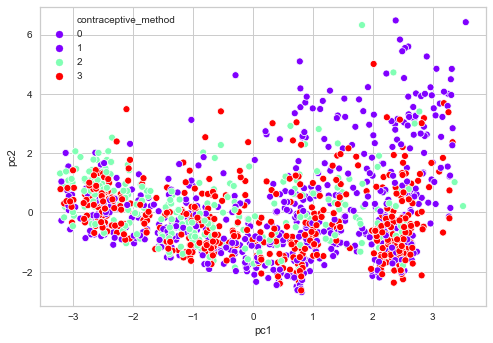

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="pc1", y="pc2", data=principalDf, hue='contraceptive_method', palette='rainbow');

In [18]:
pca3 = PCA(n_components=3)

principalComponents3 = pca3.fit_transform(data_new)
principalDf3 = pd.DataFrame(data = principalComponents3,columns = ['pc1', 'pc2', 'pc3'])
principalDf3['contraceptive_method'] = df.contraceptive_method_used
principalDf3

pc1       pc2       pc3  contraceptive_method
0     2.187348 -1.385324  0.157126                     1
1     1.524233  3.837994 -1.188703                     1
2     1.440187  1.040345 -2.360582                     1
3     2.622541  0.607292 -0.168223                     1
4     2.629847  0.076562 -0.105194                     1
...        ...       ...       ...                   ...
1468 -2.313755  0.145684 -0.225069                     3
1469 -2.499766  0.370983 -0.212539                     3
1470  0.713344  1.242553 -2.287563                     3
1471  2.041371 -0.620173  0.076738                     3
1472  1.066577 -1.433327 -1.992939                     3

[1473 rows x 4 columns]

In [19]:
#!pip install plotly.express --user

In [20]:
import plotly.express as px

fig = px.scatter_3d(principalDf3, x='pc1', y='pc2', z='pc3', color='contraceptive_method')
fig.show()

## T-SNE

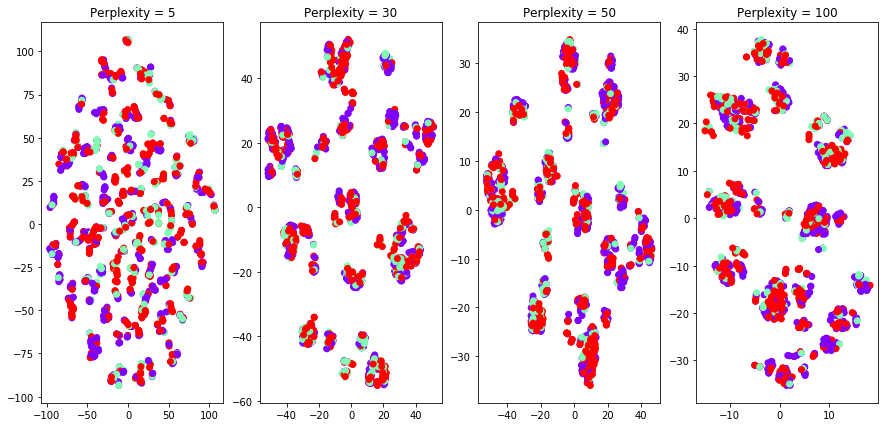

In [21]:
from sklearn.manifold import TSNE

y = df['contraceptive_method_used']
X = data_new.copy()

fig, ax = plt.subplots(1, 4, figsize=(15, 7))
for i, perp in enumerate([5, 30, 50, 100]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(X)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=y, cmap='rainbow')
    ax[i].set_title("Perplexity = {}".format(perp))
    
plt.show()

As we didn't get amazing results on previous graphs, I will use clustering algorithms on normalized data (not on reduced ones).

# Unsupervised Learning Model

## 1. Kmeans

In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans()

In [23]:
import matplotlib.pyplot as plt

How many clusters should I build?

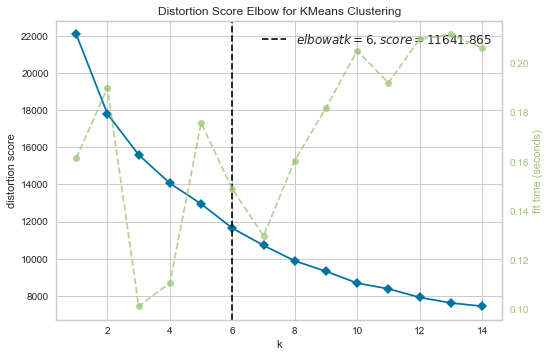

In [24]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeans, k=(1,15))

visualizer.fit(data_new)        # Fit the data to the visualizer
visualizer.show() 

In [25]:
#Fitting data:
kmeans = KMeans(n_clusters=6)

wife_clusters = kmeans.fit(data_new)
#wife_clusters.cluster_centers_

In [26]:
df['kmeans_cluster'] = wife_clusters.fit_predict(data_new)

In [27]:
df['kmeans_cluster'].value_counts()

4    414
3    390
0    334
2    165
1    126
5     44
Name: kmeans_cluster, dtype: int64

The main idea is being able to predict the contraceptive method according to informations about women.

In [28]:
df[df['kmeans_cluster'] == 0].contraceptive_method_used.value_counts(normalize=True, sort=False)

1    0.404192
2    0.254491
3    0.341317
Name: contraceptive_method_used, dtype: float64

In [29]:
df[df['kmeans_cluster'] == 1].contraceptive_method_used.value_counts(normalize=True, sort=False)

1    0.650794
2    0.047619
3    0.301587
Name: contraceptive_method_used, dtype: float64

In [30]:
df[df['kmeans_cluster'] == 2].contraceptive_method_used.value_counts(normalize=True, sort=False)

1    0.460606
2    0.163636
3    0.375758
Name: contraceptive_method_used, dtype: float64

In [31]:
df[df['kmeans_cluster'] == 3].contraceptive_method_used.value_counts(normalize=True, sort=False)

1    0.287179
2    0.382051
3    0.330769
Name: contraceptive_method_used, dtype: float64

In [32]:
df[df['kmeans_cluster'] == 4].contraceptive_method_used.value_counts(normalize=True, sort=False)

1    0.466184
2    0.135266
3    0.398551
Name: contraceptive_method_used, dtype: float64

In [33]:
df[df['kmeans_cluster'] == 5].contraceptive_method_used.value_counts(normalize=True, sort=False)

1    0.704545
2    0.227273
3    0.068182
Name: contraceptive_method_used, dtype: float64

In [34]:
df.contraceptive_method_used.value_counts(normalize=True, sort=False)

1    0.427020
2    0.226069
3    0.346911
Name: contraceptive_method_used, dtype: float64

Visualizing clusters:

In [35]:
principalDf['kmeans_clusters'] = wife_clusters.fit_predict(data_new)

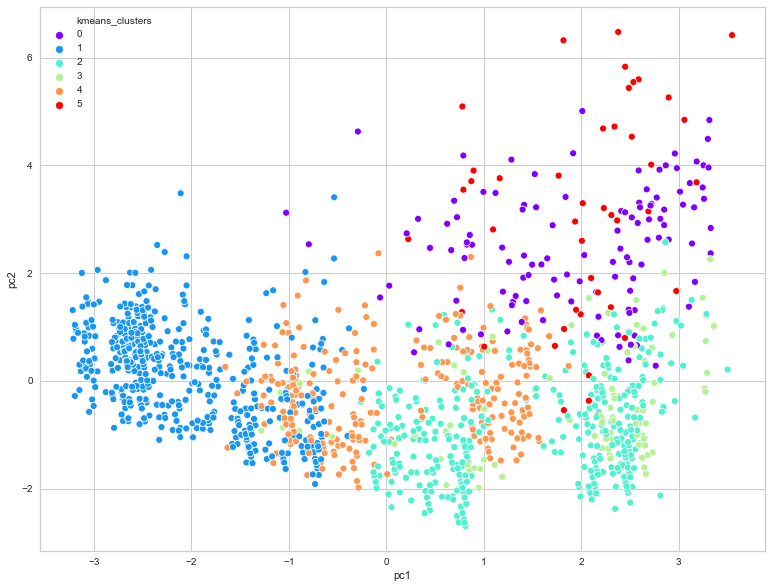

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
figure(figsize=(13, 10))

sns.scatterplot(x="pc1", y="pc2", data=principalDf, hue='kmeans_clusters', palette='rainbow',legend='full');

## Hierarchical clusters

In [37]:
from sklearn.cluster import AgglomerativeClustering

hier_clust = AgglomerativeClustering(linkage='ward',n_clusters=6)
contracep_hier = hier_clust.fit(data_new)
df['hierarchical_cluster'] = contracep_hier.labels_

In [38]:
df['hierarchical_cluster'].value_counts()

0    532
1    362
3    326
2    126
5     83
4     44
Name: hierarchical_cluster, dtype: int64

In [39]:
df[df['hierarchical_cluster'] == 0].contraceptive_method_used.value_counts(normalize=True, sort=False)

1    0.306391
2    0.368421
3    0.325188
Name: contraceptive_method_used, dtype: float64

In [40]:
df[df['hierarchical_cluster'] == 1].contraceptive_method_used.value_counts(normalize=True, sort=False)

1    0.450276
2    0.162983
3    0.386740
Name: contraceptive_method_used, dtype: float64

In [41]:
df[df['hierarchical_cluster'] == 2].contraceptive_method_used.value_counts(normalize=True, sort=False)

1    0.650794
2    0.047619
3    0.301587
Name: contraceptive_method_used, dtype: float64

In [42]:
df[df['hierarchical_cluster'] == 3].contraceptive_method_used.value_counts(normalize=True, sort=False)

1    0.438650
2    0.174847
3    0.386503
Name: contraceptive_method_used, dtype: float64

In [43]:
df[df['hierarchical_cluster'] == 4].contraceptive_method_used.value_counts(normalize=True, sort=False)

1    0.704545
2    0.227273
3    0.068182
Name: contraceptive_method_used, dtype: float64

In [44]:
df[df['hierarchical_cluster'] == 5].contraceptive_method_used.value_counts(normalize=True, sort=False)

1    0.566265
2    0.060241
3    0.373494
Name: contraceptive_method_used, dtype: float64

In [45]:
principalDf['hierarchical_clusters'] = contracep_hier.labels_

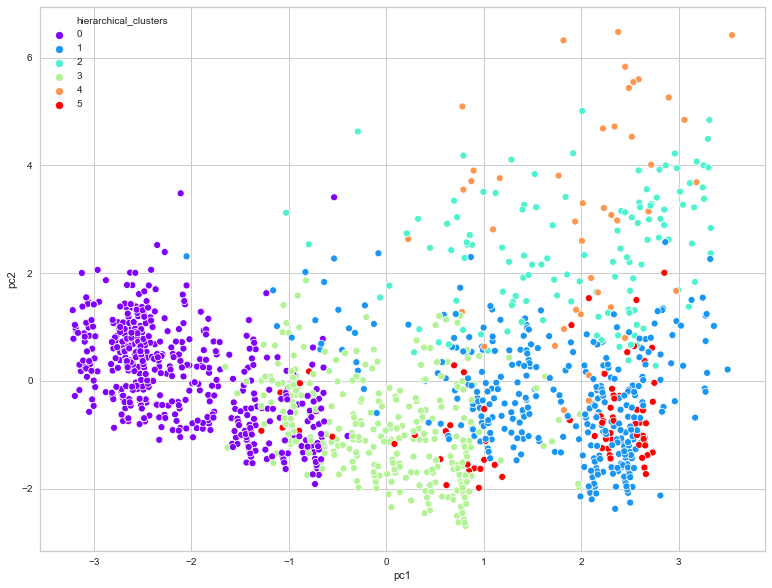

In [46]:
figure(figsize=(13, 10))
sns.scatterplot(x="pc1", y="pc2", data=principalDf, hue='hierarchical_clusters', palette='rainbow',legend='full');

# Ok,
we saw everything looks like shit and that unsupervised learning is not really useful to predict the contraceptive method used by indonesian married women by clustering them based only in socioeconomic information.

Now, we can try a new approach, by using this information to cluterizing. This way, we can achieve better results... let's repeat almost all process:

In [47]:
#The dataset is ready:
data_complete.head()

wife_age  number_of_children  wife_religion  wife_is_working  \
0        24                   3              1                1   
1        45                  10              1                1   
2        43                   7              1                1   
3        42                   9              1                1   
4        36                   8              1                1   

   media_exposure  new_wife_education_high_wife_education  \
0               0                                       0   
1               0                                       0   
2               0                                       0   
3               0                                       0   
4               0                                       0   

   new_wife_education_low_wife_education  \
0                                      0   
1                                      1   
2                                      0   
3                                      0   
4                                      0   

   new_wife_education_medium_wife_education  \
0                                         1   
1                                         0   
2                                         1   
3                                         1   
4                                         1   

   new_husband_education_high_husband_education  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   new_husband_education_low_husband_education  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   new_husband_education_medium_husband_education  \
0                                               1   
1                                               1   
2                                               1   
3                                               1   
4                                               1   

   new_standard_of_living_high_standard_of_living  \
0                                               0   
1                                               1   
2                                               1   
3                                               0   
4                                               0   

   new_standard_of_living_low_standard_of_living  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   new_standard_of_living_medium_standard_of_living  husband_occupation  \
0                                                 1                   2   
1                                                 0                   3   
2                                                 0                   3   
3                                                 1                   3   
4                                                 1                   3   

   contraceptive_method  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1

Normalizing it:

In [48]:
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()
data_complete_new = pd.DataFrame(scaler.fit_transform(data_complete), columns = data_complete.columns)
data_complete_new.head()

C:\Users\isabe\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.

C:\Users\isabe\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning:

Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.



wife_age  number_of_children  wife_religion  wife_is_working  \
0 -1.038167           -0.110856       0.419021         0.578134   
1  1.515194            2.858078       0.419021         0.578134   
2  1.272017            1.585678       0.419021         0.578134   
3  1.150428            2.433945       0.419021         0.578134   
4  0.420897            2.009811       0.419021         0.578134   

   media_exposure  new_wife_education_high_wife_education  \
0       -0.282687                               -0.802479   
1       -0.282687                               -0.802479   
2       -0.282687                               -0.802479   
3       -0.282687                               -0.802479   
4       -0.282687                               -0.802479   

   new_wife_education_low_wife_education  \
0                              -0.339211   
1                               2.948014   
2                              -0.339211   
3                              -0.339211   
4                              -0.339211   

   new_wife_education_medium_wife_education  \
0                                  0.989868   
1                                 -1.010236   
2                                  0.989868   
3                                  0.989868   
4                                  0.989868   

   new_husband_education_high_husband_education  \
0                                      -1.25148   
1                                      -1.25148   
2                                      -1.25148   
3                                      -1.25148   
4                                      -1.25148   

   new_husband_education_low_husband_education  \
0                                    -0.175473   
1                                    -0.175473   
2                                    -0.175473   
3                                    -0.175473   
4                                    -0.175473   

   new_husband_education_medium_husband_education  \
0                                        1.333884   
1                                        1.333884   
2                                        1.333884   
3                                        1.333884   
4                                        1.333884   

   new_standard_of_living_high_standard_of_living  \
0                                       -0.931085   
1                                        1.074015   
2                                        1.074015   
3                                       -0.931085   
4                                       -0.931085   

   new_standard_of_living_low_standard_of_living  \
0                                       -0.30981   
1                                       -0.30981   
2                                       -0.30981   
3                                       -0.30981   
4                                       -0.30981   

   new_standard_of_living_medium_standard_of_living  husband_occupation  \
0                                          1.109873           -0.159403   
1                                         -0.901004            0.997250   
2                                         -0.901004            0.997250   
3                                          1.109873            0.997250   
4                                          1.109873            0.997250   

   contraceptive_method  
0              -1.05001  
1              -1.05001  
2              -1.05001  
3              -1.05001  
4              -1.05001

### Reducing variables with PCA to 2D visualization

In [49]:
from sklearn.decomposition import PCA

#2 variables
pca = PCA(n_components=2)

principalComponents2 = pca.fit_transform(data_complete_new)
principalDf2 = pd.DataFrame(data = principalComponents2,columns = ['pc1', 'pc2'])
principalDf2['contraceptive_method'] = df.contraceptive_method_used
principalDf2.head()

pc1       pc2  contraceptive_method
0  2.233911 -1.253752                     1
1  1.593583  3.847060                     1
2  1.496330  1.092042                     1
3  2.673673  0.655948                     1
4  2.678251  0.137903                     1

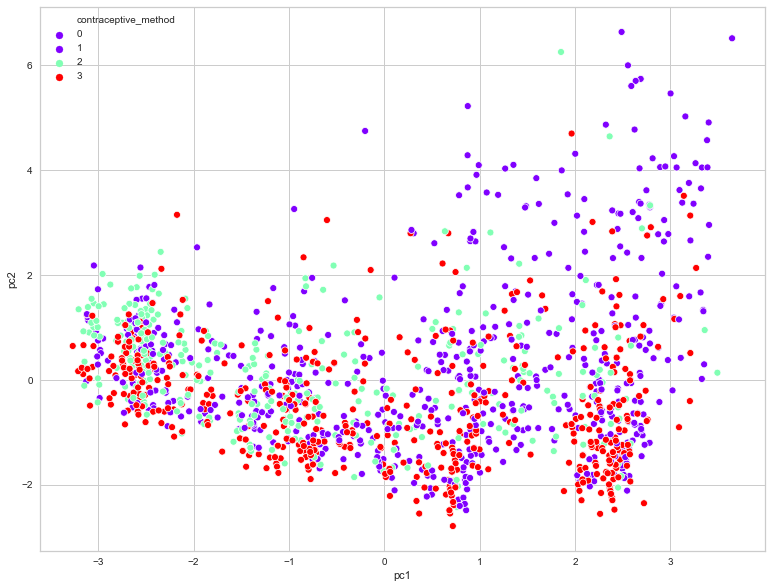

In [50]:
figure(figsize=(13, 10))
sns.scatterplot(x="pc1", y="pc2", data=principalDf2, hue='contraceptive_method', palette='rainbow');

## 1. Kmeans (using contraceptive method info)

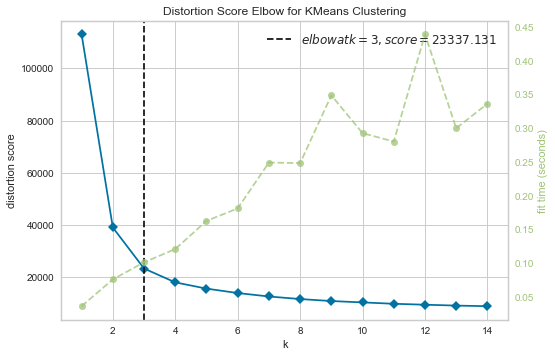

In [51]:
visualizer = KElbowVisualizer(kmeans, k=(1,15))

visualizer.fit(data_complete)        # Fit the data to the visualizer
visualizer.show();

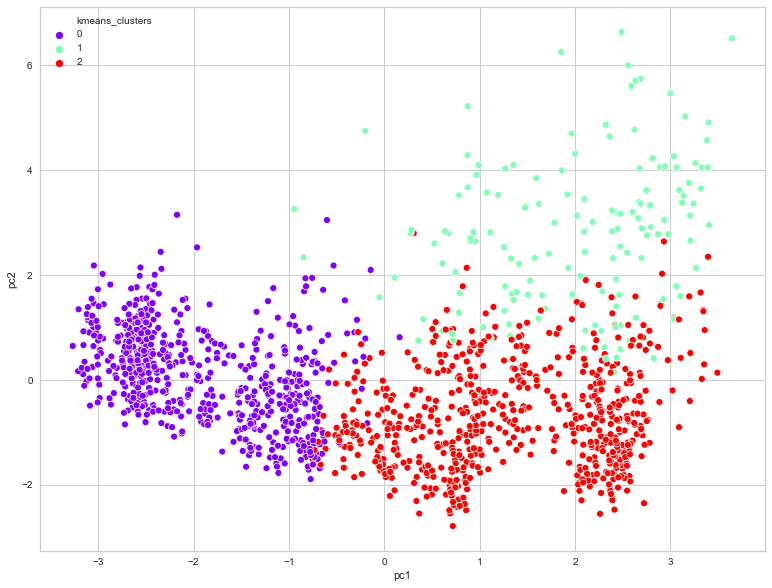

In [52]:
#Fitting data:
kmeans2 = KMeans(n_clusters=3)

wife_clusters2 = kmeans2.fit(data_complete_new)

principalDf2['kmeans_clusters'] = wife_clusters2.fit_predict(data_complete_new)

figure(figsize=(13, 10))
sns.scatterplot(x="pc1", y="pc2", data=principalDf2, hue='kmeans_clusters', palette='rainbow',legend='full');

In [53]:
print('Cluster 0')
print(principalDf2[principalDf2['kmeans_clusters'] == 0].contraceptive_method.value_counts(normalize=True, sort=False))

print('Cluster 1')
print(principalDf2[principalDf2['kmeans_clusters'] == 1].contraceptive_method.value_counts(normalize=True, sort=False))

print('Cluster 2')
print(principalDf2[principalDf2['kmeans_clusters'] == 2].contraceptive_method.value_counts(normalize=True, sort=False))

Cluster 0
1    0.311912
2    0.346395
3    0.341693
Name: contraceptive_method, dtype: float64
Cluster 1
1    0.673077
2    0.064103
3    0.262821
Name: contraceptive_method, dtype: float64
Cluster 2
1    0.478645
2    0.150221
3    0.371134
Name: contraceptive_method, dtype: float64


## 2. Hierachical clusters (using contraceptive method info)

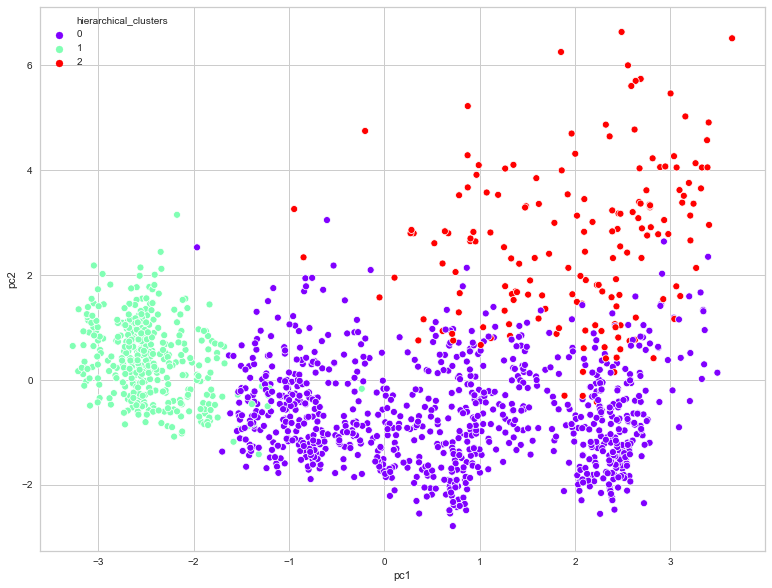

In [54]:
hier_clust2 = AgglomerativeClustering(linkage='ward',n_clusters=3)
contracep_hier2 = hier_clust2.fit(data_complete_new)
principalDf2['hierarchical_clusters'] = contracep_hier2.labels_

figure(figsize=(13, 10))
sns.scatterplot(x="pc1", y="pc2", data=principalDf2, hue='hierarchical_clusters', palette='rainbow',legend='full');

In [55]:
print('Cluster 0')
print(principalDf2[principalDf2['hierarchical_clusters'] == 0].contraceptive_method.value_counts(normalize=True, sort=False))

print('Cluster 1')
print(principalDf2[principalDf2['hierarchical_clusters'] == 1].contraceptive_method.value_counts(normalize=True, sort=False))

print('Cluster 2')
print(principalDf2[principalDf2['hierarchical_clusters'] == 2].contraceptive_method.value_counts(normalize=True, sort=False))

Cluster 0
1    0.439779
2    0.181215
3    0.379006
Name: contraceptive_method, dtype: float64
Cluster 1
1    0.296482
2    0.384422
3    0.319095
Name: contraceptive_method, dtype: float64
Cluster 2
1    0.664706
2    0.094118
3    0.241176
Name: contraceptive_method, dtype: float64


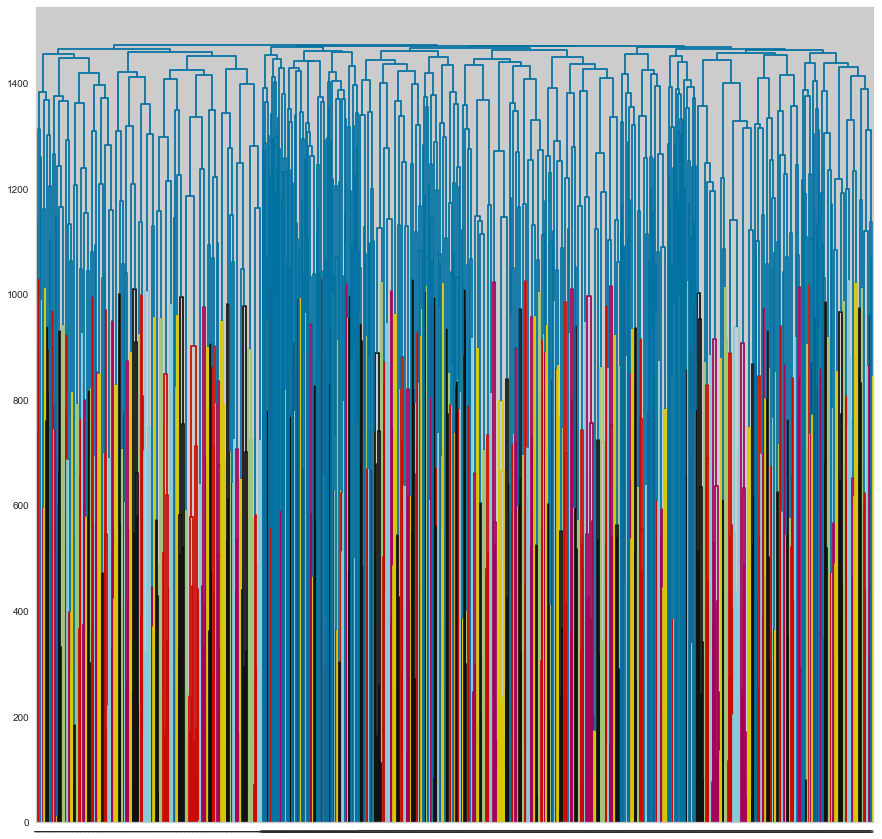

In [56]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
figure(figsize=(15, 15))
plot_dendrogram(contracep_hier2, labels=contracep_hier2.labels_)